# Importing Libraries

In [431]:
import numpy as np # linear algebra
from sklearn.cluster import KMeans
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt # for data visualization
from sklearn.metrics import silhouette_score

# Getting The Data

In [432]:
df = pd.read_csv('dice_com-job_us_sample2.csv')

# Data Preprocessing

**Drop the unrelavent columns from the dataframe**

In [433]:
df.drop(['advertiserurl', 'company', 'employmenttype_jobstatus', 'jobid',
         'postdate', 'shift', 'site_name', 'skills', 'uniq_id'], axis=1,
        inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   jobdescription       2459 non-null   object
 1   joblocation_address  2458 non-null   object
 2   jobtitle             2459 non-null   object
dtypes: object(3)
memory usage: 177.6+ KB


**Get the categorical variable you want to generate a pie chart for**

In [434]:
titles = df['jobtitle']
descriptions = df['jobdescription']
locations = df['joblocation_address']

In [435]:
array = df['jobtitle'].astype(str).to_numpy()

**Create an array of zeroes where each element correspond to the number of jobs asking for that element skills the elements of the array refer to SQL, Java, Python, Linux, JavaScript, AWS, C++, C, C#, .NET, Oracle, HTML, Scrum, Git, CSS, ML, Azure, Unix, SQL server, Docker**


In [436]:
skills = np.zeros(20)

**Store the number of repeatition of each skill in the database and that is going to present the wieght of the skills. Since it was repeated many times it means it must have higher wieght**


In [437]:
for x in array:
 if x.lower().find('sql') != -1:
  skills[0] += 1
 if x.lower().find('java') != -1:
  skills[1] += 1
 if x.lower().find('python') != -1:
  skills[2] += 1
 if x.lower().find('linux') != -1:
  skills[3] += 1
 if x.lower().find('javascript') != -1:
  skills[4] += 1
 if x.lower().find('aws') != -1:
  skills[5] += 1
 if x.lower().find('c++') != -1:
  skills[6] += 1
 if x.lower().find('c') != -1:
  skills[7] += 1
 if x.lower().find('c#') != -1:
  skills[8] += 1
 if x.lower().find('.net') != -1:
  skills[9] += 1
 if x.lower().find('oracle') != -1:
  skills[10] += 1
 if x.lower().find('html') != -1:
  skills[11] += 1
 if x.lower().find('scrum') != -1:
  skills[12] += 1
 if x.lower().find('git') != -1:
  skills[13] += 1
 if x.lower().find('css') != -1:
  skills[14] += 1
 if x.lower().find('machine learning') != -1:
  skills[15] += 1
 if x.lower().find('azure') != -1:
  skills[16] += 1
 if x.lower().find('unix') != -1:
  skills[17] += 1
 if x.lower().find('sql server') != -1:
  skills[18] += 1
 if x.lower().find('docker') != -1:
  skills[19] += 1

scores is going to store the sum of weights of the skills of each job

In [438]:
scores = []
scores = [0 for i in range(n)]

totalSkills is going to store the number of demanded skills for that job

In [439]:
totalSkills = []
totalSkills = [0 for i in range(n)]

In [440]:
index = 0

**Compute the scores and totalSkills for the database**

In [441]:
for y in array:
 if y.lower().find('sql') != -1:
  scores[index] = scores[index] + skills[0]
  totalSkills[index] +=1
 if y.lower().find('java') != -1:
  scores[index] = scores[index] + skills[1]
  totalSkills[index] +=1
 if y.lower().find('python') != -1:
  scores[index] = scores[index] + skills[2]
  totalSkills[index] +=1
 if y.lower().find('linux') != -1:
  scores[index] = scores[index] + skills[3]
  totalSkills[index] +=1
 if y.lower().find('javascript') != -1:
  scores[index] = scores[index] + skills[4]
  totalSkills[index] +=1
 if y.lower().find('aws') != -1:
  scores[index] = scores[index] + skills[5]
  totalSkills[index] +=1
 if y.lower().find('c++') != -1:
  scores[index] = scores[index] + skills[6]
  totalSkills[index] +=1
 if y.lower().find('c') != -1:
  scores[index] = scores[index] + skills[7]
  totalSkills[index] +=1
 if y.lower().find('c#') != -1:
  scores[index] = scores[index] + skills[8]
  totalSkills[index] +=1
 if y.lower().find('.net') != -1:
  scores[index] = scores[index] + skills[9]
  totalSkills[index] +=1
 if y.lower().find('oracle') != -1:
  scores[index] = scores[index] + skills[10]
  totalSkills[index] +=1
 if y.lower().find('html') != -1:
  scores[index] = scores[index] + skills[11]
  totalSkills[index] +=1
 if y.lower().find('scrum') != -1:
  scores[index] = scores[index] + skills[12]
  totalSkills[index] +=1
 if y.lower().find('git') != -1:
  scores[index] = scores[index] + skills[13]
  totalSkills[index] +=1
 if y.lower().find('css') != -1:
  scores[index] = scores[index] + skills[14]
  totalSkills[index] +=1
 if y.lower().find('machine learning') != -1:
  scores[index] = scores[index] + skills[15]
  totalSkills[index] +=1
 if y.lower().find('azure') != -1:
  scores[index] = scores[index] + skills[16]
  totalSkills[index] +=1
 if y.lower().find('unix') != -1:
  scores[index] = scores[index] + skills[17]
  totalSkills[index] +=1
 if y.lower().find('sql server') != -1:
  scores[index] = scores[index] + skills[18]
  totalSkills[index] +=1
 if y.lower().find('docker') != -1:
  scores[index] = scores[index] + skills[19]
  totalSkills[index] +=1
 index +=1

In [442]:
df['scores'] = scores
df['number_skills'] = totalSkills
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   jobdescription       2459 non-null   object 
 1   joblocation_address  2458 non-null   object 
 2   jobtitle             2459 non-null   object 
 3   scores               7574 non-null   float64
 4   number_skills        7574 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 296.0+ KB


**Inspect statical information about the data set**

In [443]:
print(df.describe())

            scores  number_skills
count  7574.000000    7574.000000
mean    327.357539       0.276472
std     637.706900       0.570764
min       0.000000       0.000000
25%       0.000000       0.000000
50%       0.000000       0.000000
75%       0.000000       0.000000
max    1823.000000       6.000000


# Visualizing The Data

**Plot scores vs number_skills**

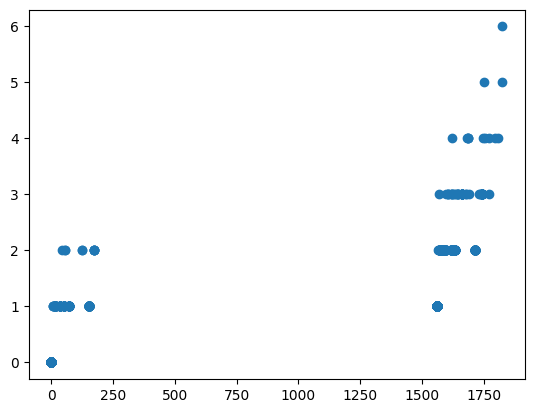

In [444]:
X = df['scores']
Y = df['number_skills']
plt.scatter(X,Y)

**Use min-max scaler to normalize the data**

The min-max scaler takes the minimum and maximum values of a given column and uses them to scale all values between 0 and 1.

In [445]:
scaler = MinMaxScaler()
scaler.fit(df[['scores']])
df['scores'] = scaler.transform(df[['scores']])
scaler.fit(df[['number_skills']])
df['number_skills'] = scaler.transform(df[['number_skills']])

**Plot again to visualize the distribution**

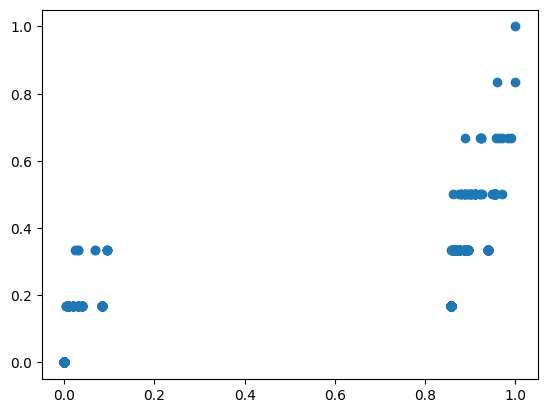

In [446]:
plt.scatter(df.scores,df['number_skills'])

**Use the elbow method to find the right number of clusters k**

In [447]:
sse = []
k_rng = range(1,10)
for K in k_rng:
 km1 = KMeans(n_clusters=K)
 km1.fit(df[['scores','number_skills']])
 sse.append(km1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Plot SSE for different values of k to find the optimal k**

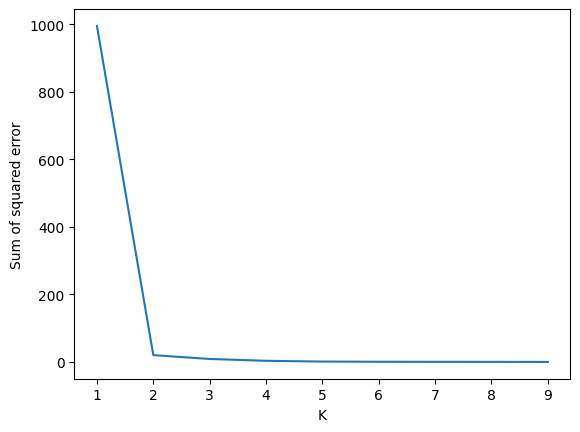

In [448]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

based on the SSE vs K plot the most optimal k is 2

In [449]:
scaler = MinMaxScaler()
scaler.fit(df[['scores']])
df['scores'] = scaler.transform(df[['scores']])
scaler.fit(df[['number_skills']])
df['number_skills'] = scaler.transform(df[['number_skills']])

**Define a KMeans object with the value of k set to 2**

In [450]:
km2 = KMeans(n_clusters=2)

**Predict the data set excluding the index column**


In [451]:
y_predicted = km2.fit_predict(df[['scores','number_skills']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Add a column to the data frame to store the predicted cluster ID of each element**

In [452]:
df['cluster'] = y_predicted

**Define the two data frames, df1, df2 each belonging to one of the two clusters**

In [453]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

**Plot the dataframes with different colors to differentiate them along with the centroids.**

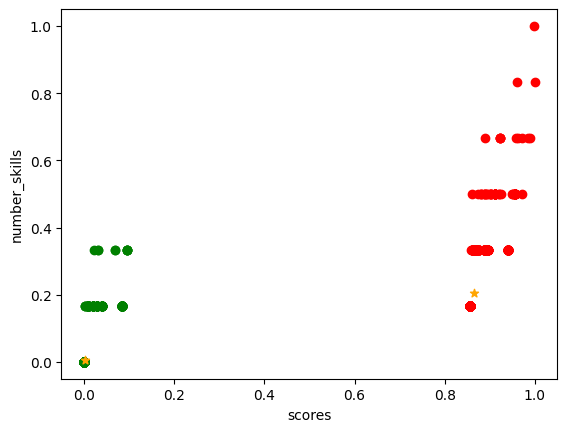

In [454]:
plt.scatter(df1['scores'], df1['number_skills'], color='green')
plt.scatter(df2['scores'], df2['number_skills'], color='red')
plt.xlabel('scores')
plt.ylabel('number_skills')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color='orange',marker='*',label='centroid')

In [455]:
print(df.cluster)

0       0
1       1
2       1
3       1
4       0
       ..
7569    0
7570    0
7571    0
7572    0
7573    0
Name: cluster, Length: 7574, dtype: int32
